<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">Visualización</h1>

<h4 align="center">Matplotlib, Seaborn y Plotly</h4>
<pre><div align="center"> La idea de este notebook es que sirva para iniciarse en la visualización de datos.</div>


<div align="right"> En términos de código y estructura, este notebook esta basado en los notebooks 
<a href="https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips">Simple Matplotlib Visualization Tips</a>, <a href="https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners">SeaBorn Tutorial for Beginners</a>.


.</div></pre>

## Visualización de datos

La visualización de datos es la disciplina de tratar de comprender los datos colocándolos en un contexto visual para que los patrones, las tendencias y las correlaciones que de otro modo no podrían detectarse puedan quedar expuestos.

<p><img alt="COVID" width=600 src="https://miro.medium.com/max/700/1*N0tRnDv63278HUKF_dE4HA.png", align="center", hspace=0, vspace=5></p>

Python ofrece múltiples librerías de visualización, cada una con muchas características diferentes. No importa si desea crear trazados interactivos, en vivo o altamente personalizados, Python tiene una excelente biblioteca para cada gusto y uso.

Nos centraremos en introducir tres librerías en este laboratorio: **Matplotlib**, **Seaborn** y **Plotly**.

<h3>Secciones</h3>

<div class="alert alert-danger" role="alert">
<ol>
    <li><a href="#section1"> Matplotlib </a></li>
    <li><a href="#section2"> Seaborn </a></li>
    <li><a href="#section4"> Plotly </a></li>
</ol>
</div>
<hr>

<a id="section1"></a>
<h1> 1. Matplotlib </h1>
    
Matplotlib es la O.G. de las librerías de visualización de datos de Python. A pesar de tener más de una década, sigue siendo la biblioteca más utilizada para graficar en la comunidad Python; fue diseñado para parecerse mucho a MATLAB, un lenguaje de programación patentado desarrollado en la década de 1980.

Debido a que Matplotlib fue la primera librería de visualización de datos de Python, muchas otras librerías están construidas sobre ella o diseñadas para trabajar en conjunto con ella durante el análisis.

<p><img alt="Pandas" width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Matplotlib_icon.svg/1200px-Matplotlib_icon.svg.png", align="right", hspace=0, vspace=5></p>

Si bien Matplotlib es bueno para tener una idea de los datos, no es muy útil para crear gráficos de calidad de publicación de manera rápida y fácil.

Para instalar la librería puede hacerse a través del comando **pip** o el comando **conda** en la consola de comandos:



```cmd
conda install matplotlib

pip install matplotlib
```

In [1]:
!pip install matplotlib

In [2]:
# Importando las librerías

import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.ticker import FuncFormatter

import seaborn as sns # theme & dataset

El código a continuación es para el preprocesamiento de los datos que utilizaremos en las visualizaciones

In [3]:
# Preprocesamiento de datos


# Títulos de Netflix

netflix_titles = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%201%20-%20Podstawy%20j%C4%99zyka/R/netflix_titles.csv")
netflix_date = netflix_titles[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

def mes(x):
    if x == "January": return "Enero"
    elif x == "February": return "Febrero"
    elif x == "March": return "Marzo"
    elif x == "April": return "Abril"
    elif x == "May": return "Mayo"
    elif x == "June": return "Junio"
    elif x == "July": return "Julio"
    elif x == "August": return "Agosto"
    elif x == "September": return "Septiembre"
    elif x == "October": return "Octubre"
    elif x == "November": return "Noviembre"
    elif x == "December": return "Diciembre"
    else: return x
    
netflix_date['month'] = netflix_date['month'].apply(mes)

month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

movie = netflix_titles[netflix_titles['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]    


# Sobrevivientes Titanic

def age_band(num):
    for i in range(1, 100):
        if num < 10*i : 
            return f'under {i*10}'
 
titanic_train = pd.read_csv("https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv")
titanic_train['age_band'] = titanic_train['age'].apply(age_band)
titanic_age = titanic_train[['age_band', 'survived']].groupby('age_band')['survived'].value_counts().sort_index().unstack().fillna(0)

titanic_age['survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100


# Desempeño de estudiantes

exam_data = pd.read_csv("https://raw.githubusercontent.com/Jakki-SP/Datasets/master/StudentsPerformance.csv")


### 1.0 Configuraciones iniciales

Algo que rara vez se hace y debiera ser necesario antes de cualquier visualización en notebooks, es establecer la resolución a través de la configuración **dpi** (Dots per inche) de la figura. Matplotlib tiene una resolución predeterminada baja, por lo que configurarla a medida hace que los gráficos se vean más profesionales.

In [4]:
# Estableciendo la resolución de las figuras

plt.rcParams['figure.dpi'] = 60

Existe una cierta anatomía de una figura realizada con matplotlib (Y con cualquier librería de visualización), la cual podemos apreciar a priori en la siguiente imagen.

<p><img alt="COVID" width=600 src="https://scontent.fscl6-1.fna.fbcdn.net/v/t1.0-9/101147394_10223322201184885_7931971586804940800_n.jpg?_nc_cat=100&_nc_sid=8024bb&_nc_ohc=7s50oZWJPegAX97cGCE&_nc_ht=scontent.fscl6-1.fna&oh=bb8b9a6a22cf1564b02d3a5d3144c1a5&oe=5F00954B", align="center", hspace=0, vspace=5></p>


### 1.1 Gráficos básicos

Lo primero que haremos es plotear dos vectores de la misma dimensión, uno correspondiente al **eje x** y otro al **eje y**. Este es el gráfico más básico que podemos obtener con Matplotlib.

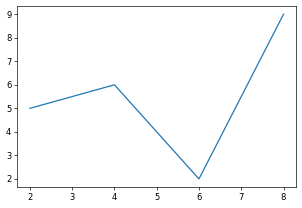

In [5]:
# Gráfico de linea en 2D

x = [2 , 4 , 6 , 8]
y = [5 , 6 , 2 , 9]

plt.plot(x,y)

Podemos añadir un color distinto a la linea que graficamos anteriormente mediante el argumento opcional **color**.

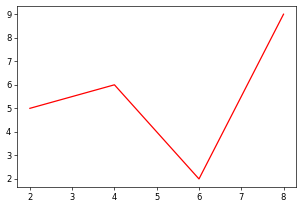

In [6]:
# Agregando color

x = [2 , 4 , 6 , 8]
y = [5 , 6 , 2 , 9]

plt.plot( x , y , color = 'red')

Además podemos darle más características al gráfico, asi como título, leyenda y ejes, no obstante debemos definirlos como nuevos elementos para añadirlos a este.

Text(0, 0.5, 'Eje y')

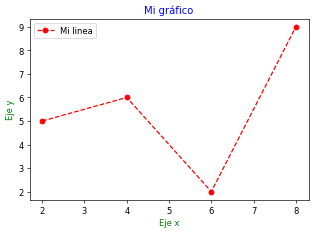

In [7]:
# Agregando título, leyenda y ejes

x = [2 , 4 , 6 , 8]
y = [5 , 6 , 2 , 9]

plt.plot( x , y , color = 'red', label = 'Mi linea', marker = 'o', linestyle = '--')
plt.title('Mi gráfico', color = 'blue')

plt.legend()
plt.xlabel('Eje x', color = 'green')
plt.ylabel('Eje y', color = 'green')


Y no solo podemos gráficar vectores, sino también funciones que ya esten definidas en librerías como numpy, o en funciones que nosotros mismos programemos.

Text(0.5, 1.0, 'Graficando funciones')

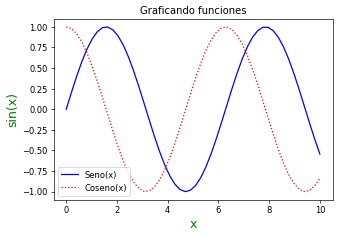

In [8]:
# Graficando las funciones seno y coseno


x = np.linspace(0,10,50)

plt.plot(x, np.sin(x), label='Seno(x)', color = 'blue')

plt.plot(x, np.cos(x), label='Coseno(x)', color = 'red', linestyle = ':')

plt.xlabel('x', fontsize=15, color='green')
plt.ylabel('sin(x)', fontsize=15, color='green')
plt.legend()
plt.title('Graficando funciones') 

### 1.2 Múltiples gráficos

Podemos utilizar la función **subplots** para poner varios gráficos en la misma figura, separando cada gráfico en su propio box de ejes.

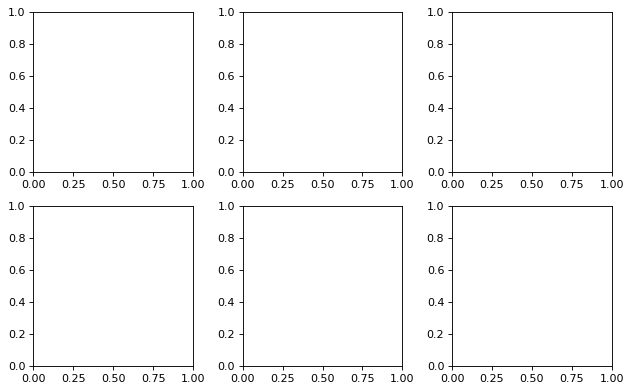

In [9]:
# Ejemplo de subplot

plt.rcParams['figure.dpi'] = 80
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

¿Pero que pasa si quiero distintas cajas de distintos tamaños?
Por ejemplo, los gráficos de barras y los gráficos circulares suelen ser muy diferentes en relación. En este caso, el diseño debe ser diferente; para esto se puede cambiar y manipular fácilmente el sistema de cuadrícula usando la función **subplot2grid**.

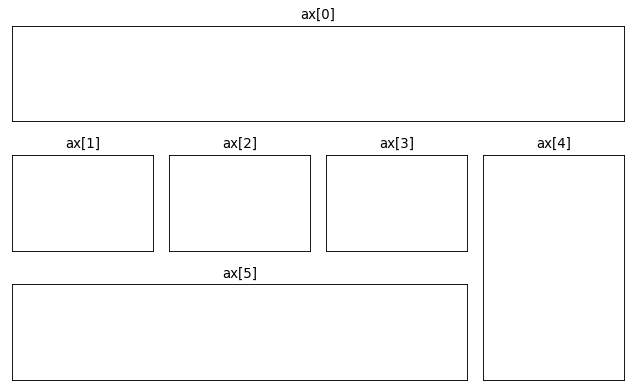

In [10]:
# Manipulando subplots

fig = plt.figure(figsize=(8, 5)) 

ax = [None for _ in range(6)] 

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) 
    ax[ix].set_xticks([])
    ax[ix].set_yticks([]) 
    
fig.tight_layout()
plt.show()

### 1.3 Mapas de colores

El color es una de las cosas más importantes en un gráfico. Por supuesto, el equipo de matplotlib ya ha creado una buena paleta de colores, y solo necesitamos usarla. Entre las 4 categorías más utilizadas de paletas de colores encontramos la **divergente**, la **cualitativa**, la **continua** y la **científica**.

<hr>

 * <u>Mapa de colores **divergente**</u>
 
     - Este mapa de colores se usa generalmente en visualizaciones donde la mediana es obvia.
 
     - Generalmente se visualiza sobre un fondo blanco, blanco en el centro y de color más oscuro hacia ambos extremos. En otras palabras, cuanto más claro sea el valor, más cerca del centro, más oscuro, más cerca del final.
 
     - Útil para expresar sesgo, como la correlación y la disposición política.
 
     - Si bien es un mapa de colores continuo, también puede usar una paleta de colores discreta dependiendo del intervalo.

In [11]:
# Función para plotear un colormap

def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=150)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'Colormap {ctype}', fontweight='bold', fontsize=8)
    plt.show()

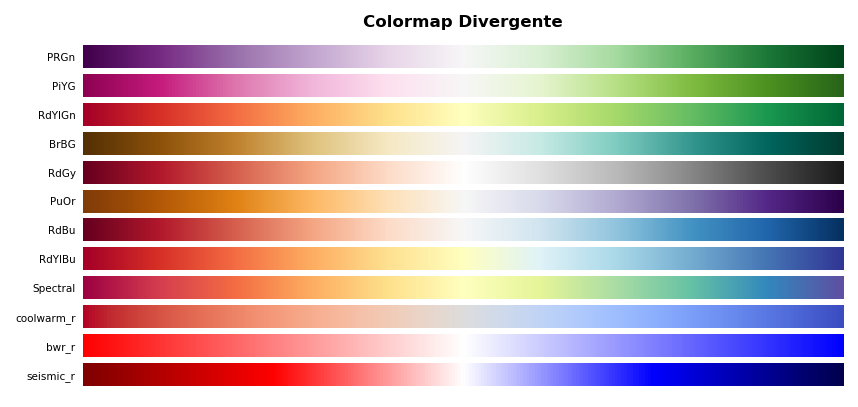

In [12]:
# Ploteando colormap divergente

diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Divergente')

* <u>Mapa de colores **cualitativo**</u>
 
     - Una paleta de colores independientes, a menudo utilizada para variables categóricas.
 
     - Se recomienda organizar hasta 10 colores y agrupar pequeñas categorías con otras.
 
     - La repetición de colores puede ser confusa, así que trate de evitar la superposición lo más posible. Es una buena idea cambiar de color a color en lugar de saturación y brillo.

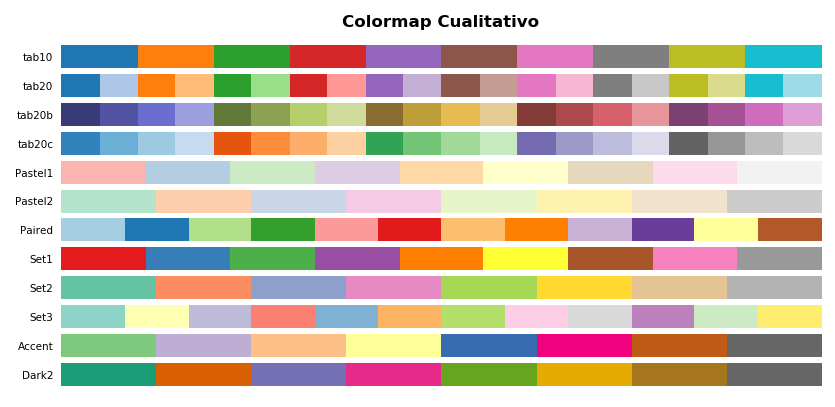

In [13]:
# Ploteando colormap cualitativo

qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c', 'Pastel1', 'Pastel2', 'Paired', 'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )
cmap_plot(qualitative_cmap, 'Cualitativo')

* <u>Mapa de colores **continuo**</u>
 
     - Esta paleta es apropiada para variables con números o valores ordenados.
 
     - Usado mucho en comparación de cifras. Especialmente eficaz para expresar densidad. Aproveche los gráficos de mapas para una mejor visualización.
     
     - Similar a divergente, pero con una parte ligeramente diferente porque cada punto final es un criterio de color, no la mediana. Por lo general, indica que los valores de luz son oscuros en fondos oscuros y valores oscuros en fondos claros.
     
     - Se recomienda usar un solo tono para el color.
     
     - Al igual que la divergente, también se puede usar en forma discreta.

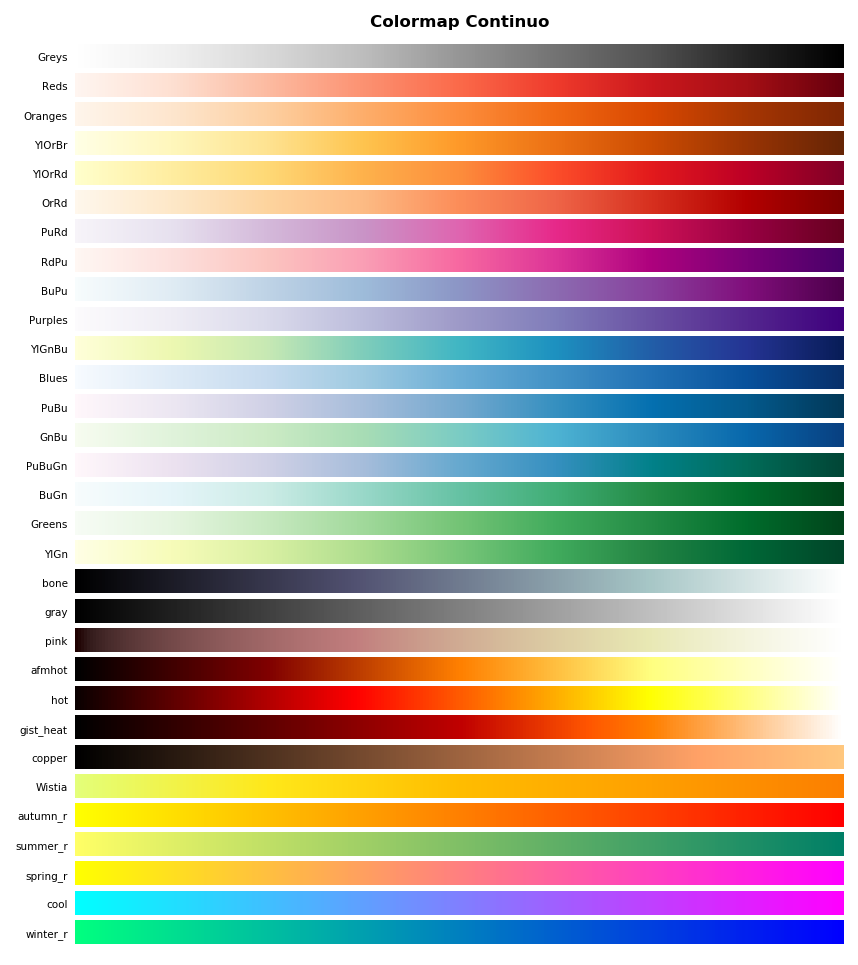

In [14]:
# Ploteando colormap continuo

sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            
cmap_plot(sequential_cmap, 'Continuo')

 * <u>Mapa de colores **científico**</u>
 
     - Utilizado en gráficos científicos.

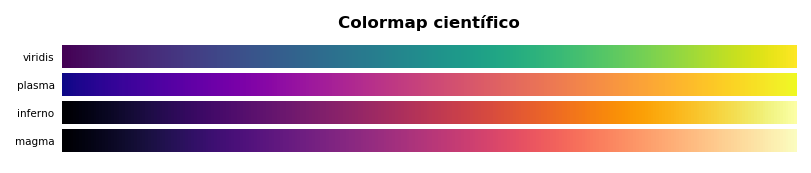

In [15]:
# Ploteando colormap científico

scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'científico')

Veamos a continuación un ejemplo utilizando un colormap, en donde analizaremos las actualizaciones de contenido de la plataforma Netflix.

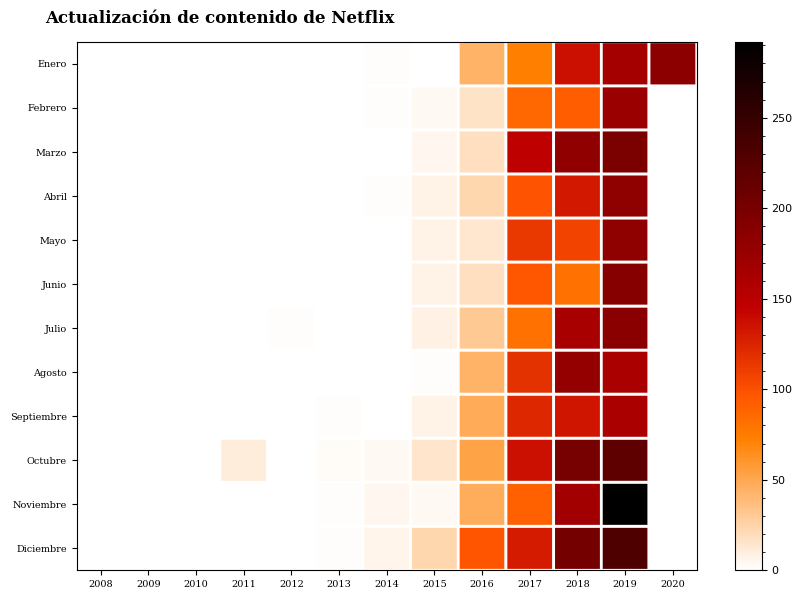

In [16]:
# Actualización de contenido de Netflix

plt.figure(figsize=(10, 7), dpi=100)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Actualización de contenido de Netflix', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### 1.4 Detalles

Poner atención a pequeños detalles en la visualización nos ayudará a enfocar mejor la atención a lo más importante. Es importante que una visualización sea buena para lograr apoyar de la mejor manera a la toma de decisión y para documentar con estilo los reportes y proyectos.

In [33]:
titanic_age

survived,0,1,survival rate
age_band,,,
under 10,24.0,38.0,61.290323
under 20,61.0,41.0,40.196078
under 30,143.0,77.0,35.000000
under 40,94.0,73.0,43.712575
under 50,55.0,34.0,38.202247
under 60,28.0,20.0,41.666667
under 70,13.0,6.0,31.578947
under 80,6.0,0.0,0.000000
under 90,0.0,1.0,100.000000


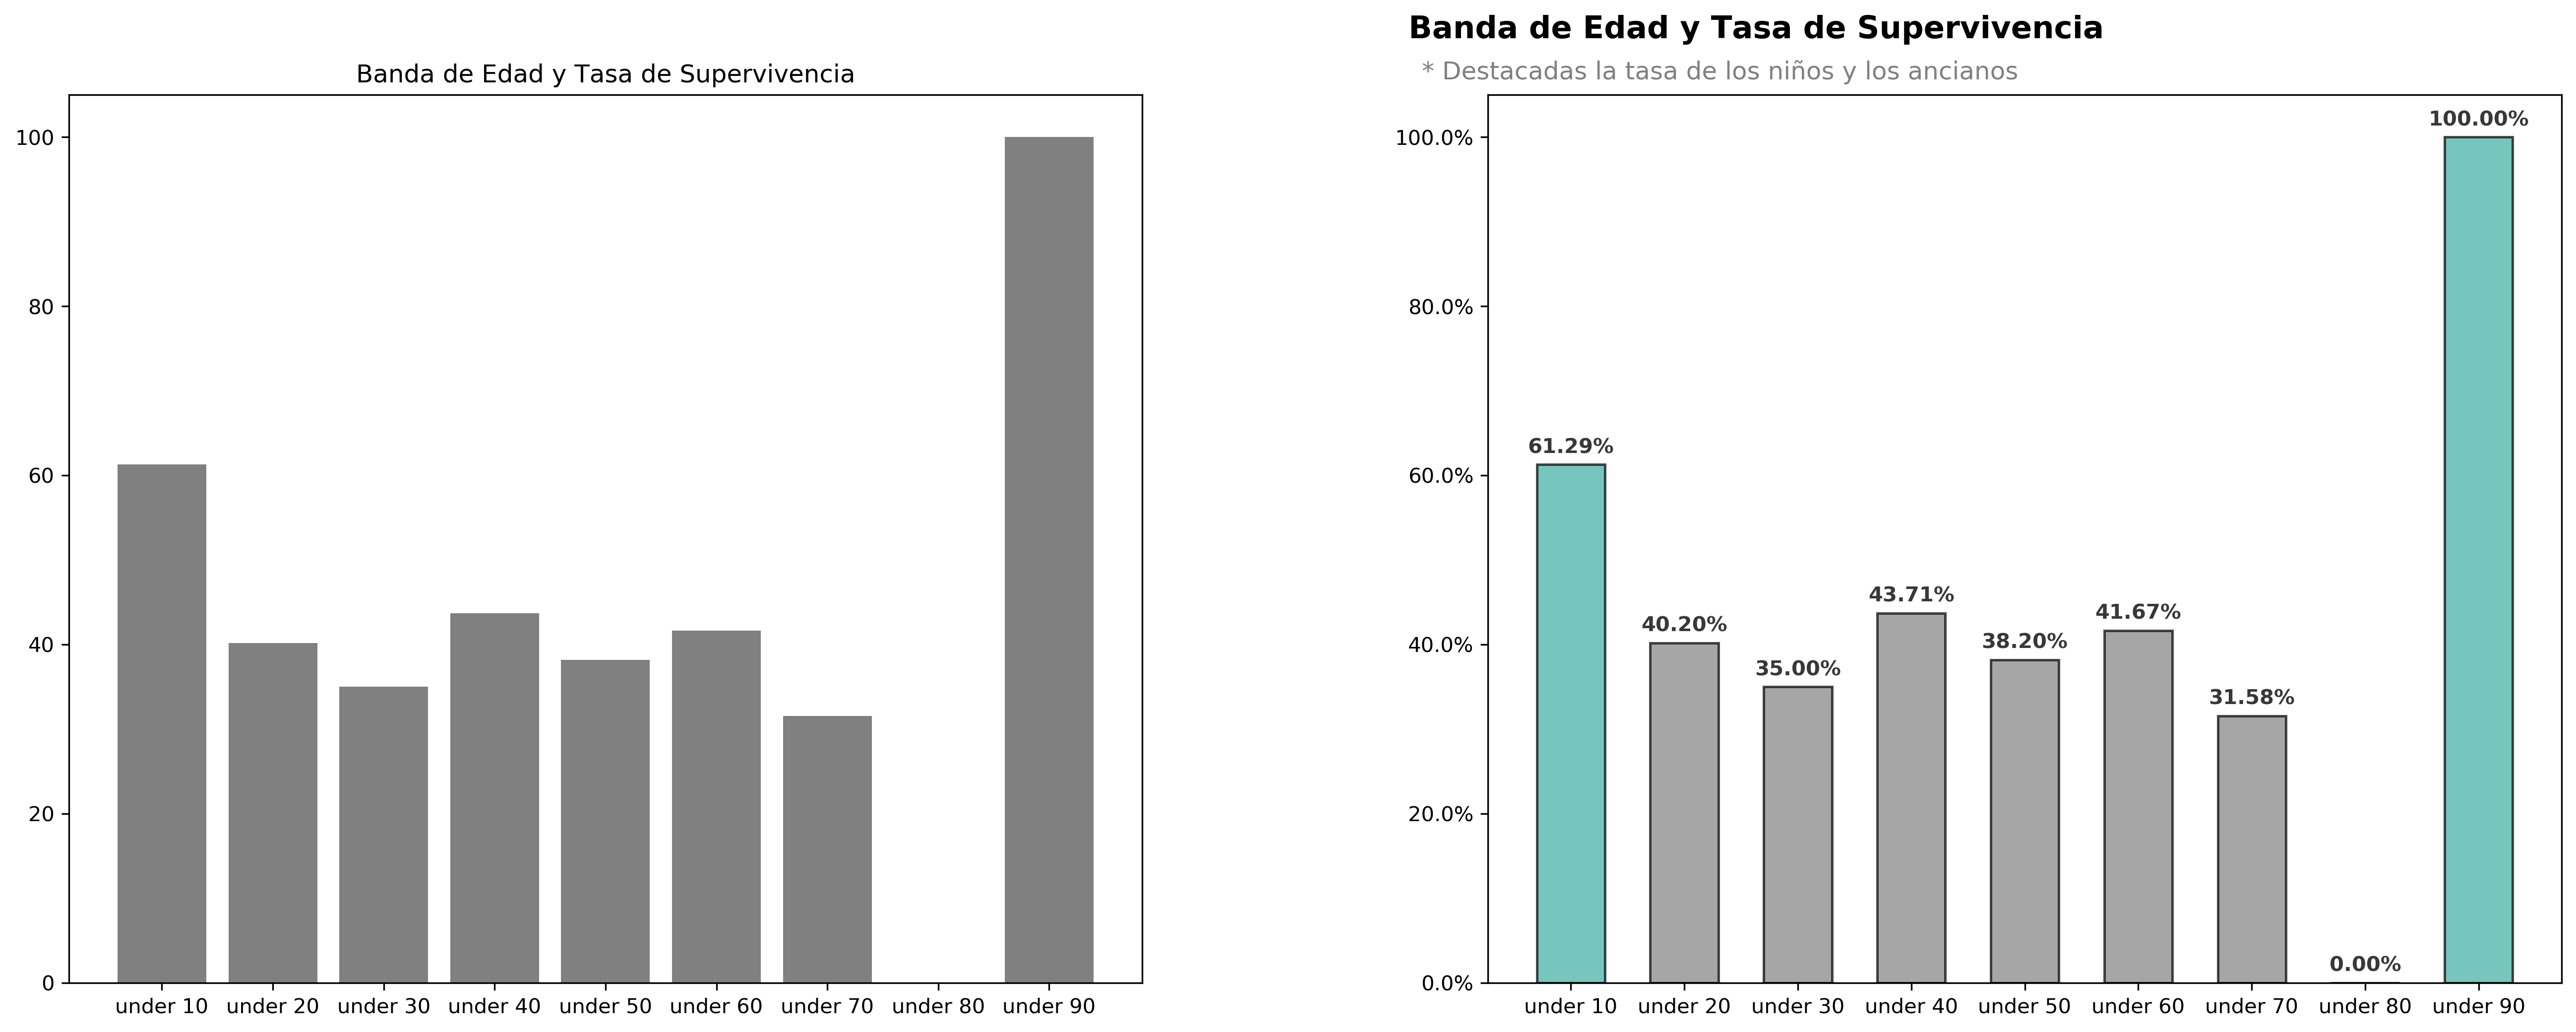

In [17]:
#Ejemplo sobrevivientes titanic

fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)

# ax1
ax[0].bar(titanic_age['survival rate'].index, titanic_age['survival rate'], color='gray')
ax[0].set_title('Banda de Edad y Tasa de Supervivencia')

# ax2
color_map = ['gray' for _ in range(9)]
color_map[0] = color_map[8] = '#3caea3'
ax[1].bar(titanic_age['survival rate'].index, titanic_age['survival rate'], alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax[1].set_title('Banda de Edad y Tasa de Supervivencia', fontsize=15, fontweight='bold', position=(0.25, 1.0+0.05))
for i in titanic_age['survival rate'].index:
    ax[1].annotate(f"{titanic_age['survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['survival rate'][i] + 2),
                   va = 'center', ha='center',fontweight='bold', color='#383838'
                  )

ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%')) 
plt.suptitle('* Destacadas la tasa de los niños y los ancianos', x=0.65, y=0.94, color='gray')
plt.subplots_adjust(left=0.5, right=0.8)
plt.tight_layout()
plt.show()

Otra forma de darle estilo e información a nuestros gráficos es analizar distintos segmentos para ver si podemos entregar más información, como en el ejemplo que sigue:

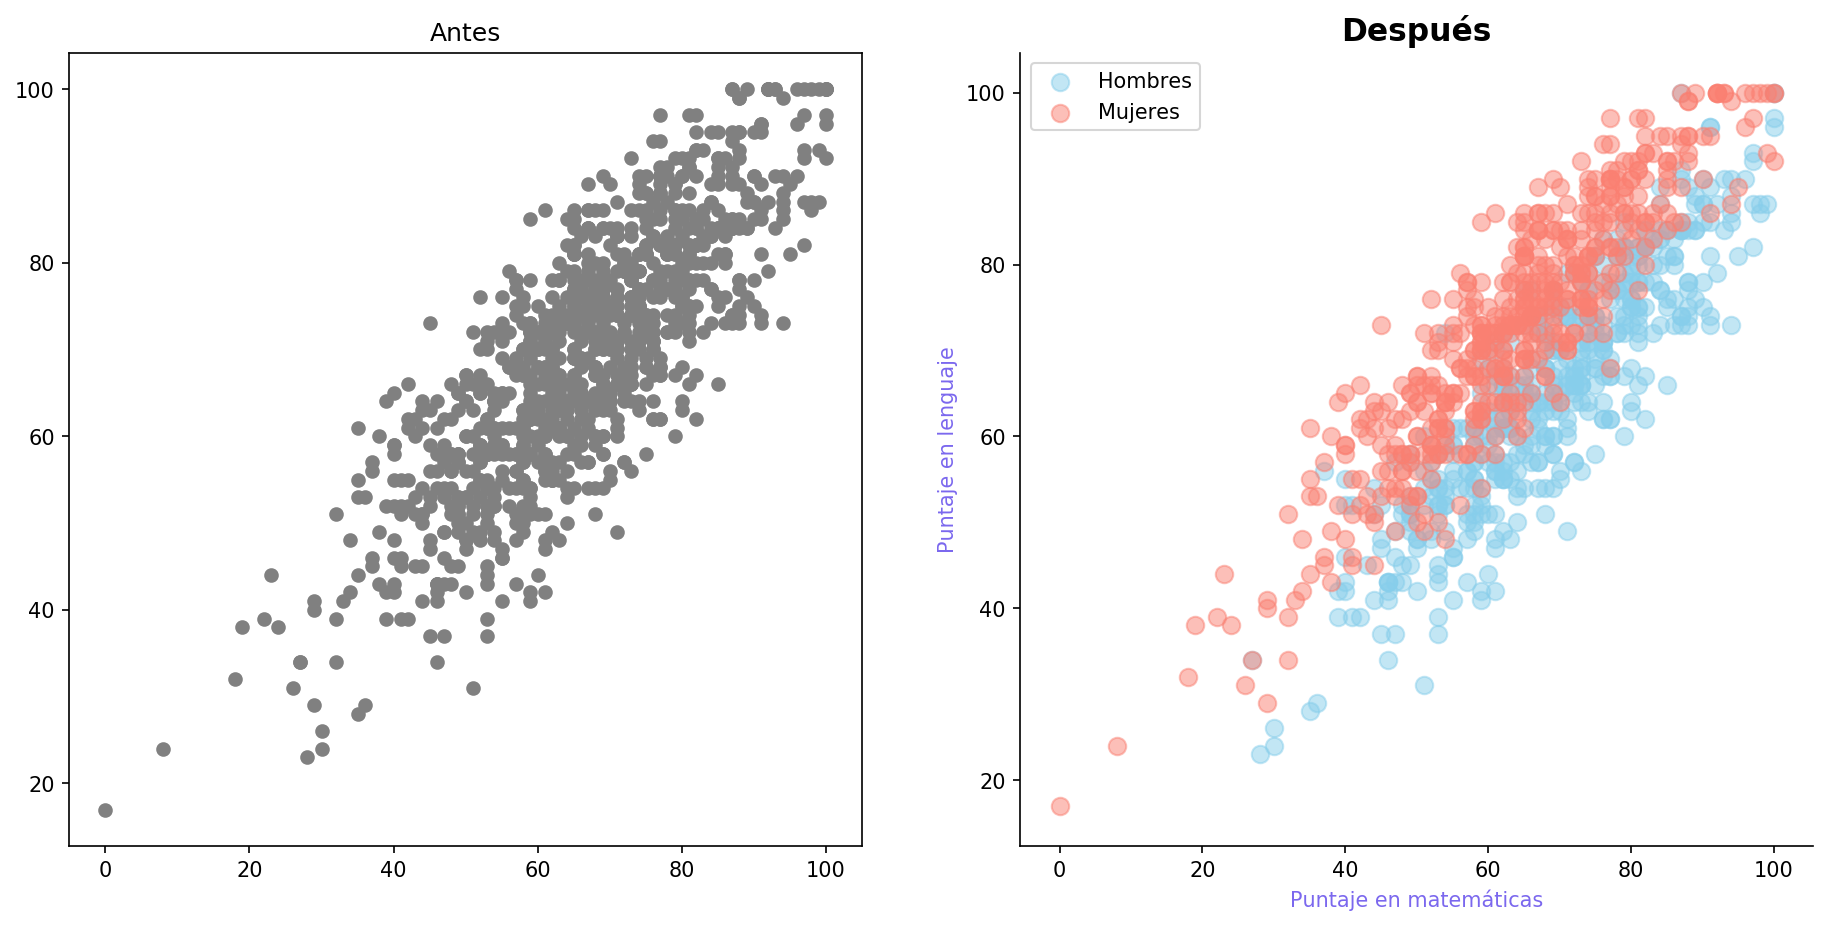

In [18]:
# Ejemplo notas

fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=exam_data, color='gray')
ax[0].set_title('Antes')

# You can use sns.scatterplot + hue parameter
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='male'], color='skyblue', alpha=0.5, label='Hombres', s=70)
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='female'], color='salmon', alpha=0.5, label='Mujeres', s=70)
ax[1].set_title('Después', fontsize=15, fontweight='bold')

ax[1].legend()
ax[1].set_xlabel('Puntaje en matemáticas', color = 'mediumslateblue')
ax[1].set_ylabel('Puntaje en lenguaje', color = 'mediumslateblue')

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Para más ejemplos de gráficos utilizando MatplotLib recomendamos visitar el artículo <a href="https://nextjournal.com/sosiristseng/top-50-matplotlib-visualizations">Top 50 Matplotlib visualizations</a>.

<a id="section2"></a>
<h1> 2. Seaborn </h1>
    
Seaborn aprovecha el poder de matplotlib para crear gráficos hermosos en unas pocas líneas de código. La diferencia clave son los estilos y paletas de colores predeterminados de Seaborn, que están diseñados para ser más estéticamente agradables y modernos. Dado que Seaborn está construido sobre matplotlib, necesitará saber matplotlib para modificar los valores predeterminados de Seaborn

<p><img alt="Pandas" width=150 src="https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/Seaborn-logo.png", align="right", hspace=0, vspace=5></p>

Para instalar la librería puede hacerse a través del comando **pip** o el comando **conda** en la consola de comandos:



```cmd
conda install seaborn

pip install seaborn
```

In [19]:
# Importamos la librería (Formalismo)

import seaborn as sns
from collections import Counter

In [20]:
# Importamos los datasets

median_house_hold_in_come = pd.read_csv('https://raw.githubusercontent.com/RegaipKURT/Data_Visualisation_with_SEABORN/master/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('https://raw.githubusercontent.com/RegaipKURT/Data_Visualisation_with_SEABORN/master/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('https://raw.githubusercontent.com/RegaipKURT/Data_Visualisation_with_SEABORN/master/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('https://raw.githubusercontent.com/RegaipKURT/Data_Visualisation_with_SEABORN/master/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('https://raw.githubusercontent.com/RegaipKURT/Data_Visualisation_with_SEABORN/master/PoliceKillingsUS.csv', encoding="windows-1252")

En nuestro primer ejemplo analizaremos la tasa de pobreza en los estados de USA.

In [21]:
# Preprocesamiento

percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

Text(0.5, 1.0, 'Tasa de pobreza decreciente por estados')

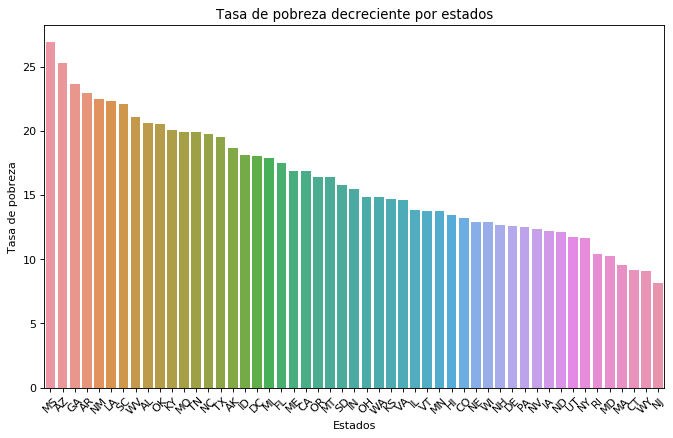

In [22]:
# Ejemplo

plt.figure(figsize=(10,6))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Estados')
plt.ylabel('Tasa de pobreza')
plt.title('Tasa de pobreza decreciente por estados')

Haremos ahora un segundo ejemplo, en donde plotearemos la tasa de graduación de la educación superior en los estados de USA.

In [23]:
# Preprocesamos los datos

percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

Text(0.5, 1.0, 'Porcentaje de gente sobre 25 años graduada')

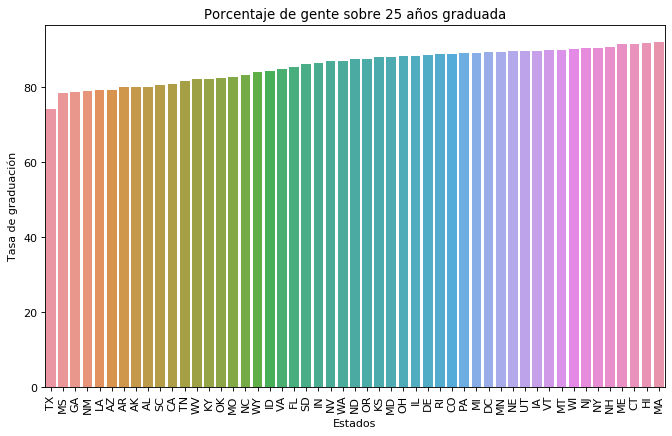

In [24]:
# Ejemplo tasa de graduación

plt.figure(figsize=(10,6),)
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Estados')
plt.ylabel('Tasa de graduación')
plt.title("Porcentaje de gente sobre 25 años graduada")

Veamos otro ejemplo, en donde graficaremos en orden de radio de pobreza los estados y veremos su tasa de graduación.

In [25]:
# Procesamiento de datos

sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

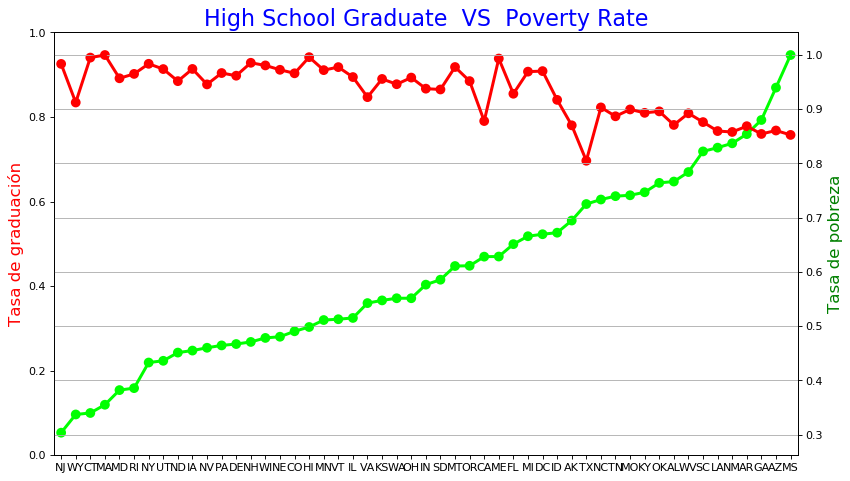

In [26]:
# Ejemplo de series

f,ax1 = plt.subplots(figsize =(12,7))
ax2 = ax1.twinx()
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.xlabel('States',fontsize = 15,color='blue')
ax1.set_ylabel('Tasa de graduación',fontsize = 15,color='red')
ax2.set_ylabel('Tasa de pobreza',fontsize = 15,color='green')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

<a id="section3"></a>
<h1> 3. Plotly </h1>
    
Plotly es una librería que ayuda en la visualización de datos de manera interactiva, se creó para hacer que los datos sean más significativos al tener gráficos interactivos y gráficos que también podrían crearse en línea. El hecho de que pudiéramos visualizar los datos en línea eliminó muchos obstáculos asociados con el uso fuera de línea de una biblioteca. Sin embargo, Plotly puede usarse como una herramienta tanto fuera de línea como en línea, lo que nos brinda lo mejor de ambos mundos.

<p><img alt="Pandas" width=200 src="https://upload.wikimedia.org/wikipedia/commons/3/37/Plotly-logo-01-square.png", align="right", hspace=0, vspace=5></p>

Para instalar la librería puede hacerse a través del comando **pip** o el comando **conda** en la consola de comandos:



```cmd
conda install plotly

pip install plotly
```

In [27]:
# Importando la librería


from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py

init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly import tools

In [28]:
# Preprocesando los datos

timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

df = timesData.iloc[:100,:]
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
df2014_top3 = timesData[timesData.year == 2014].iloc[:3,:]
df2016_top7 = timesData[timesData.year == 2016].iloc[:7,:]
y_saving = [each for each in df2016_top7.research]
y_net_worth  = [float(each) for each in df2016_top7.income]
x_saving = [each for each in df2016_top7.university_name]
x_net_worth  = [each for each in df2016_top7.university_name]


Analizemos un primer ejemplo, en donde veremos la estructura para comenzar a trabajar a futuro con Plotly si lo deseamos.

In [29]:
# Ejemplo, ranking en citaciones y enseñanza del top 100 de universidades del mundo

# Creando las lineas

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)

# Guardando ambos objetos en un diccionario, que serán nuestros datos

data = [trace1, trace2]

# Guardando en un diccionario las opciones del layout

layout = dict(title = 'Citaciones y Enseñanza vs Ranking del Top 100 de Universidades',
              xaxis= dict(title= 'Ranking',ticklen= 5,zeroline= False)
             )

# Creando un diccionario para la figura

fig = dict(data = data, layout = layout)

# Ploteando con iplot

iplot(fig)

Cabe destacar que si cambiamos un argumento en el modo del objeto Scatter, podemos dibujar gráficos de puntos; además para darle más detalles al gráfico podemos utilizar mas argumentos en el diccionario correspondiente al layout.

In [30]:
# Ejemplo, Scatter separado por año para las citaciones

trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)

trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)

trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citaciones vs Ranking del Top 100 de Universidades el 2014, 2015 y 2016',
              xaxis= dict(title= 'Ranking',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citaciones',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)


Existen otros tipos de objetos que podemos crear con esta librería, como lo son los gráficos de barra.

In [31]:
# Ejemplo gráficos de barra

trace1 = go.Bar(
                x = df2014_top3.university_name,
                y = df2014_top3.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014_top3.country)
# create trace2 
trace2 = go.Bar(
                x = df2014_top3.university_name,
                y = df2014_top3.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014_top3.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Si nos ponemos a jugar un poco con el código y las opciones de detalle podemos hacer muchisimos gráficos interactivos más complejos!

In [32]:
# Ejemplo dos gráficos

trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h')

trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income')

layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)')

annotations = []

y_s = np.round(y_saving, decimals=2)

y_nw = np.rint(y_net_worth)


for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations



fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

C:\Users\Familia\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Ahora pueden comenzar a profundizar más sobre distintas ideas y dudas que tengan sobre visualización!